In [6]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from datetime import datetime as dt
from scipy import stats

from news_vec.utils import read_json_gz_lines

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [8]:
df = pd.DataFrame(list(tqdm(read_json_gz_lines('../../data/clf-acc-ts-ova.json/'))))

136500it [00:00, 386362.84it/s]


In [9]:
df.head(10)

,acc,domain,window
0,0.682680,wsj.com,64
1,0.719343,thehill.com,16
2,0.634640,huffingtonpost.com,1
3,0.656131,foxnews.com,47
4,0.687737,apnews.com,64
5,0.723135,apnews.com,68
6,0.609355,nytimes.com,58
7,0.739570,msnbc.com,20
8,0.589128,washingtonpost.com,58
9,0.730721,bloomberg.com,9


In [29]:
rows = []
for d in df.domain.unique():
    pdf = df[df.domain==d].sort_values('window')
    lr = stats.linregress(pdf.window, pdf.acc)
    rows.append((d, lr.slope, lr.intercept, lr.rvalue, lr.pvalue))

In [30]:
lr_df = pd.DataFrame(rows, columns=('domain', 'slope', 'intercept', 'r', 'p'))

In [31]:
lr_df.sort_values('slope', ascending=False)

,domain,slope,intercept,r,p
3,foxnews.com,0.000453,0.617737,0.555671,0.000000e+00
10,buzzfeed.com,0.000401,0.771119,0.498490,0.000000e+00
0,wsj.com,0.000191,0.674188,0.284071,1.751081e-168
13,dailycaller.com,0.000138,0.624920,0.195054,1.000468e-78
9,breitbart.com,0.000077,0.675468,0.115679,1.739303e-28
4,apnews.com,0.000055,0.706199,0.085597,2.855107e-16
7,washingtonpost.com,0.000033,0.598609,0.045615,1.342220e-05
8,bloomberg.com,0.000005,0.739706,0.008411,4.223980e-01
12,npr.org,-0.000058,0.622803,-0.086352,1.560576e-16
5,nytimes.com,-0.000083,0.636170,-0.123161,4.288676e-32


In [32]:
tick_labels = [
    dt.fromtimestamp(ts).strftime('%-m/%Y')
    for ts in np.linspace(1483228802, 1537207799, 10, dtype='int')
]

In [78]:
tick_locs = np.linspace(0, len(df.window.unique()), len(tick_labels), dtype='int')

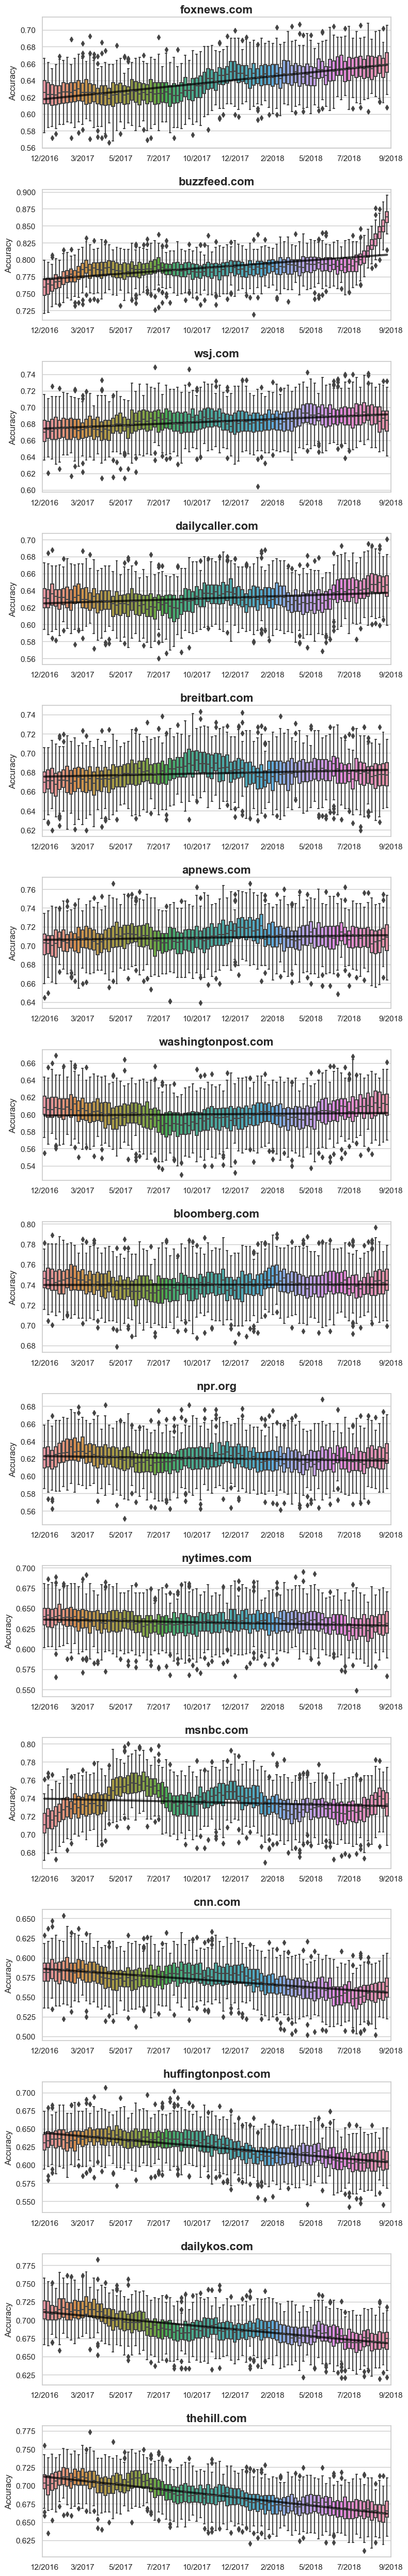

In [79]:
fig, axes = plt.subplots(len(lr_df), 1, figsize=(8,50), dpi=100)

for i, r in enumerate(lr_df.sort_values('slope', ascending=False).itertuples()):
    
    ax = axes[i]
    pdf = df[df.domain==r.domain].sort_values('window')
    
    fitx = np.array([pdf.window.min(), pdf.window.max()])
    fity = r.slope * fitx + r.intercept
    
    sns.boxplot(x='window', y='acc', data=pdf, ax=ax)
    ax.plot(fitx, fity, c='black', linewidth=3, alpha=0.7)
    ax.set_xticks(tick_locs)
    ax.set_xticklabels(tick_labels)
    
    ax.set_title(r.domain, fontdict=dict(fontsize=16, fontweight='bold'))
    ax.set_xlabel(None)
    ax.set_ylabel('Accuracy')
    
plt.tight_layout(h_pad=2)
plt.savefig('figures/ts-ova.png')